In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


In [19]:
def COSDensity(cf,x,N,a,b):
    i = 1j #assigning i=sqrt(-1)
    k = np.linspace(0,N-1,N)
    u = np.zeros([1,N])
    u = k * np.pi / (b-a)
        
    #F_k coefficients
    F_k    = 2.0 / (b - a) * np.real(cf(u) * np.exp(-i * u * a));
    F_k[0] = F_k[0] * 0.5; # adjustment for the first term
    
    #Final calculation
    f_X = np.matmul(F_k , np.cos(np.outer(u, x - a )))
        
    # we output only the first row
    return f_X

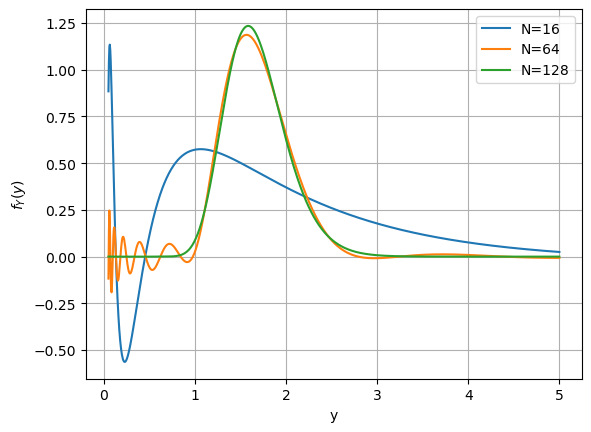

In [20]:
def mainCalculation():


    i = 1j #assigning i=sqrt(-1)
    
    # setting for the COS method 
    a = -10
    b = 10
    
    #define the range for the expansion points
    N = [16, 64, 128]
    
    # setting for normal distribution
    mu = 0.5
    sigma = 0.2 
        
    # Define characteristic function for the normal distribution
    cF = lambda u : np.exp(i * mu * u - 0.5 * np.power(sigma,2.0) * np.power(u,2.0));
    
    # define domain for density
    y = np.linspace(0.05,5,1000)
        
    plt.figure(1)
    plt.grid()
    plt.xlabel("y")
    plt.ylabel("$f_Y(y)$")
    for n in N:
        f_Y = 1/y * COSDensity(cF,np.log(y),n,a,b)

        plt.plot(y,f_Y)
    plt.legend(["N=%.0f"%N[0],"N=%.0f"%N[1],"N=%.0f"%N[2]])
    
    
mainCalculation()